# Independent Project: K-Nearest Neighbor Classification


The dataset1 has the following features: The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:

* survived
* Age
* passenger-class
* sex
* fare
* Embarked

## Importing libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset 
train = pd.read_csv('/content/train (5).csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# tail of the dataset
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# importing column names
test = pd.read_csv('/content/test (1).csv')
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
#  checking tail of dataset
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# checking info of data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# checking info ya test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# shaping of train
train.shape

(891, 12)

In [9]:
# shaping of test
test.shape

(418, 11)

In [10]:
# Checking for duplicate values in train dataset
train.duplicated().sum()

0

In [11]:
# Checking for duplicate values in test dataset
test.duplicated().sum()

0

In [12]:
# Checking for null values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Checking for null values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Dropping unnecessary columns that aren't integral to the analysis.

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

In [15]:
# Dropping unnecessary columns that aren't integral to the analysis.

test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

In [16]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [17]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [18]:
# Replacing null values with mode
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [19]:
# checking for null values
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [20]:
 # checking for null values
 train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [21]:
# Changing column names to lowercase
train.columns=train.columns.str.strip().str.lower()

In [22]:
# Changing column names to lowercase
test.columns=test.columns.str.strip().str.lower()

In [23]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S


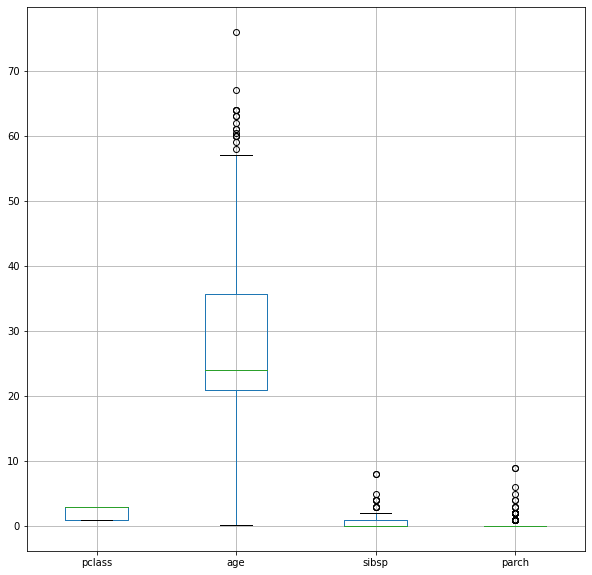

In [24]:
#Checking for outliers on test dataset
check= ['pclass','age','sibsp','parch']
plt.subplots(figsize=(10,10))
test.boxplot(check)
plt.show()

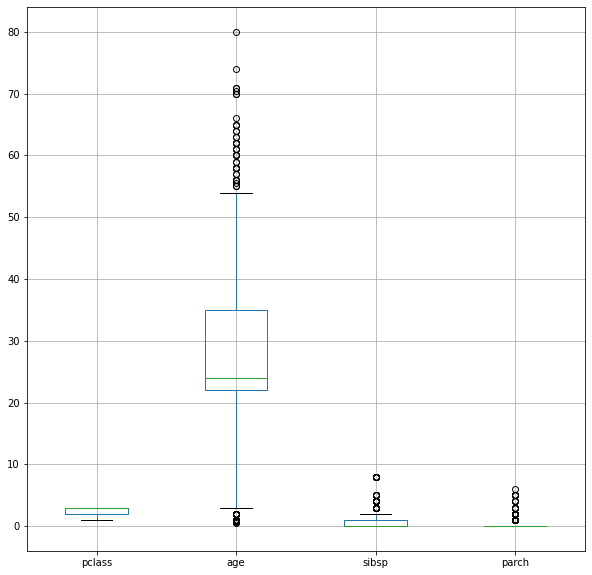

In [25]:
#Checking for outliers on train dataset
check= ['pclass','age','sibsp','parch']
plt.subplots(figsize=(10,10))
train.boxplot(check)
plt.show()

## Exploratory analysis

## frequency table

In [26]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

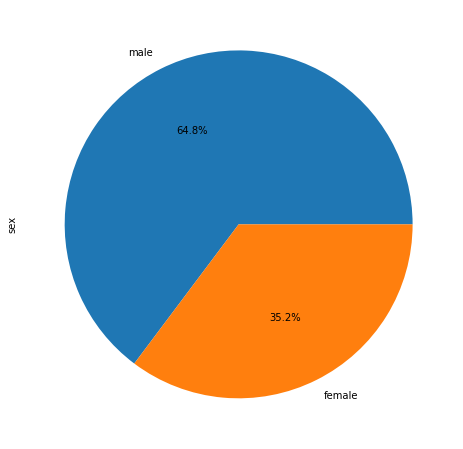

In [27]:
# pie chart for sex
train['sex'].value_counts().plot(autopct='%1.1f%%',kind='pie',figsize=(8,8));

 male were most than female

In [28]:
# Value counts for embarked
train['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

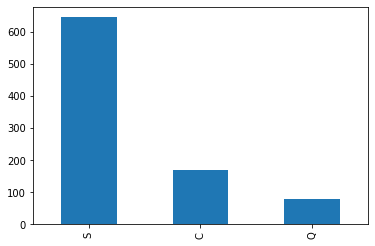

In [29]:
# Bar graph for embarked column
train['embarked'].value_counts().plot(kind='bar');

 Most people boarded from Southampton then Cherbourg and  lastly Queenstown.

In [30]:
# Value count for survivers
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

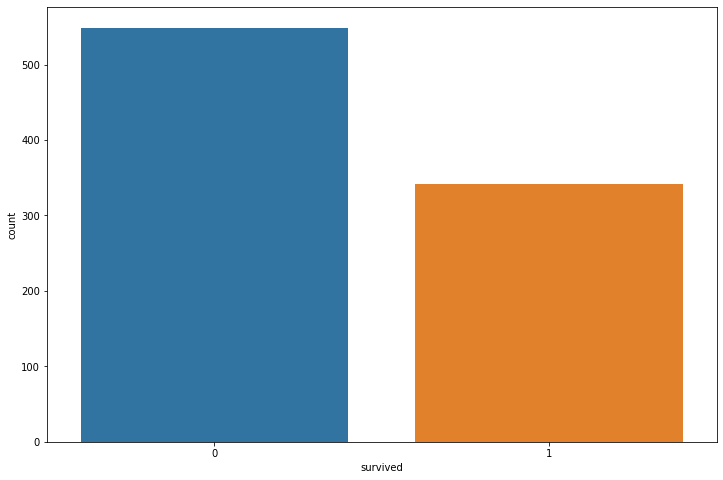

In [31]:
# bar graph for survived column
plt.figure(figsize=(12,8))
sns.countplot(data=train,x='survived')

Survival 0  means died and 1  means survived. A number of people died are more than people who survived

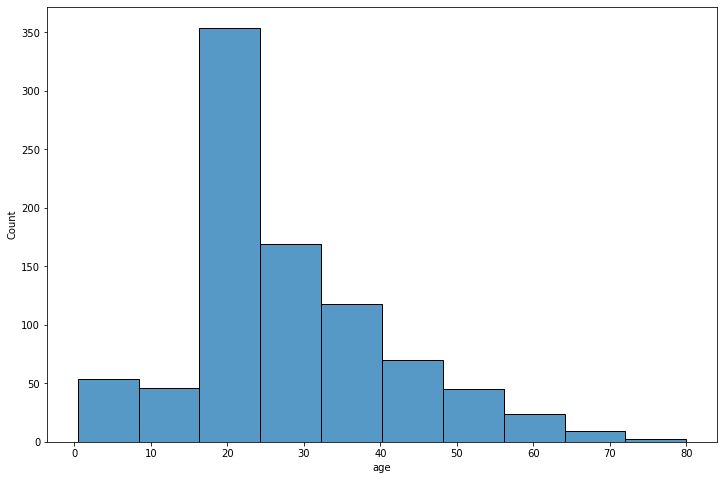

In [32]:
# bar graph for age column
plt.figure(figsize=(12,8))
sns.histplot(train['age'],bins=10);

We can see from bar graph that alot of people who boarded  the titanic were between 25 years and 40 years



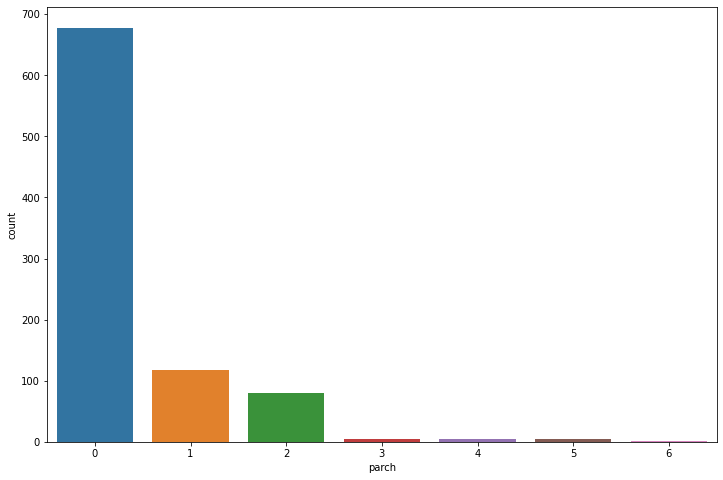

In [33]:
# bar graph for parch - Number of Parents/Children Aboard
plt.figure(figsize=(12,8))
sns.countplot(x=train['parch'],data=train);

A lot of parents had zero number of children Aboard

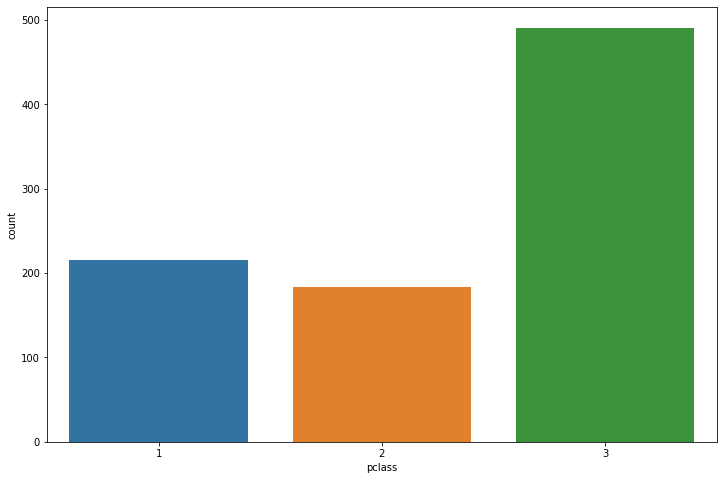

In [34]:
# bar graph for class
plt.figure(figsize=(12,8))
sns.countplot(x=train['pclass'],data=train);

A lot of  people booked third class followed by first class then second class

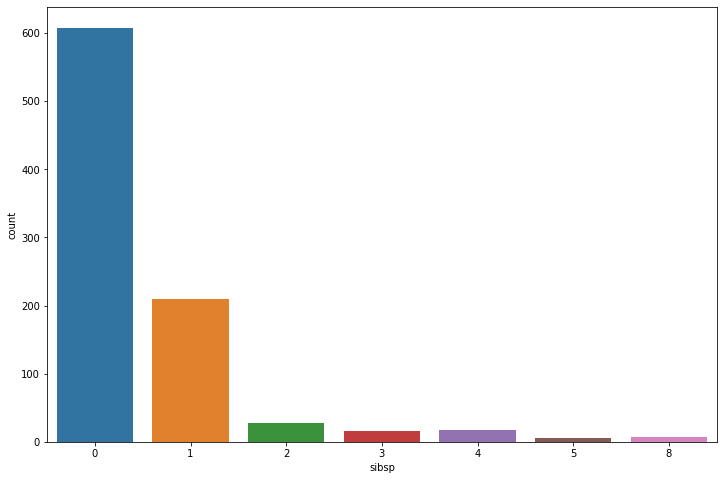

In [35]:
# bar graph for class Number of Siblings/Spouses Aboard
plt.figure(figsize=(12,8))
sns.countplot(x=train['sibsp'],data=train);

A lot of people had zero number of Siblings/Spouses Aboard

## Bivariate analysis

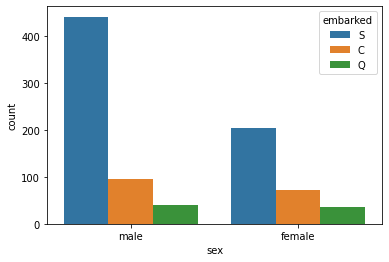

In [36]:
#comparing male and female who boarded the titanic from which area
sns.countplot(x=train['sex'],hue=train['embarked']);

We can see that alot of male and female boarded titanic from southampton.

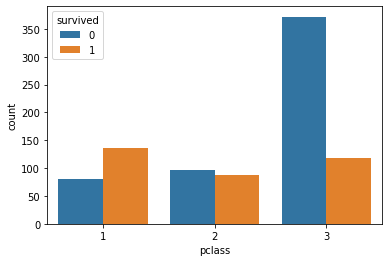

In [84]:
# Pclass aganist survivors
sns.countplot(x=train['pclass'],hue=train['survived']);

 A lot of people who died are passengers from 3rd class. Number of people who  survived and died were in 2 class is almost the same. In first  class the number of people who survived is higher than people who died.

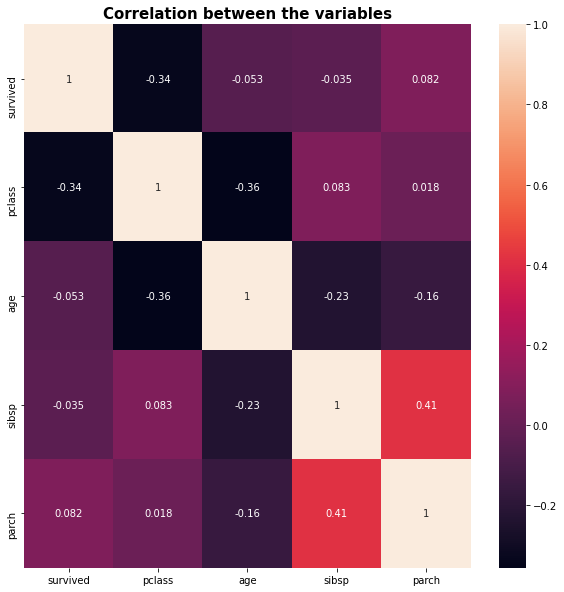

In [37]:
# plotting the correlation using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.title('Correlation between the variables',fontsize=15,fontweight='bold')
plt.show()

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
train['sex'] = label_encoder.fit_transform(train['sex'])
train['embarked'] = label_encoder.fit_transform(train['embarked'])
test['sex'] = label_encoder.fit_transform(test['sex'])
test['embarked'] = label_encoder.fit_transform(test['embarked'])

In [39]:
# Splitting the training dataset
X = train.drop(['survived'], axis=1).values
y = train['survived'].values

## 80-20 split

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [41]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5)

model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# The final step is to make predictions on our test data
y_pred = model1.predict(X_test)

In [44]:
# Importing metrics to see how our model performance
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.7988826815642458


In [46]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[99, 13],
       [23, 44]])

In [47]:
# classication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       112
           1       0.77      0.66      0.71        67

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



When we have a 80-20 split we have an accracy score of 80% ,recall of 88% and f1-score of 85%. We misclassified 36 people out of 179

70-30 split

In [48]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
# predicting y values
y_pre = model2.predict(X_test)

In [50]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_pre))

accuracy score: 0.776536312849162


In [51]:
# confusion matrix
confusion_matrix(y_test,y_pre)

array([[101,  11],
       [ 29,  38]])

In [52]:
# classication report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.78      0.57      0.66        67

    accuracy                           0.78       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



We had an accuracy score of 78%, f1-score 83%  and recall of 90% .We misclassified 50 people out of 179

60-40 split

In [53]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
# predicting y values
y_p = model3.predict(X_test)

In [55]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_p))

accuracy score: 0.776536312849162


In [56]:
# confusion matrix
confusion_matrix(y_test,y_p)

array([[101,  11],
       [ 29,  38]])

In [57]:
# classication report
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.78      0.57      0.66        67

    accuracy                           0.78       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



We had an accuracy score of 78%, f1-score 83%  and recall of 90% .We misclassified 50 people out of 179

## Improve attempt

In [58]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
# Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
parameters = [{'n_neighbors' : np.arange(1, 11),
               'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['auto', 'brute', 'ball_tree', 'kd_tree']}]

In [60]:
from sklearn.model_selection import  GridSearchCV
grid = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=parameters,
                      scoring='accuracy',
                      refit=True,
                      cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'brute', 'ball_tree',
                                        'kd_tree'],
                          'metric': ['minkowski', 'euclidean', 'manhattan',
                                     'chebyshev'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
# best estimator
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [62]:
tr = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [63]:
# fitting 
tr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [64]:
# predicting 
y_z = tr.predict(X_test)

In [65]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_z))

accuracy score: 0.8044692737430168


In [66]:
# confusion matrix
confusion_matrix(y_test,y_z)

array([[105,   7],
       [ 28,  39]])

In [67]:
# classication report
print(classification_report(y_test,y_z))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       112
           1       0.85      0.58      0.69        67

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179



GridSearchCv has performed well with an accuracy score of 80% and we have misclassified 35 people out of 179 people